<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Actividad%2011/%20Actividad_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos algunas bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use('bmh')

**Ejercicio 1:**

Modifique el algoritmo de diferencias finitas empleado anteriormente y resuelva la ecuación de onda amortiguada en una dimensión, dada por la ecuación

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} + 
 b \frac{\partial u}{\partial t}
 = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

donde $b \ge 0 $ y $c$ son constantes. 

Se proporcionan las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Utilice diferencias finitas centradas de segundo orden para aproximar la primer derivada $\partial u/\partial t$.

\begin{equation*}
\frac{\partial}{\partial t} u(x,t) \approx \frac{u(x,t+k) - u(x,t-k)}{2k}
\end{equation*}

Suponga las mismas características del ejemplo presentado anteriormente $L=10$, $c=100$m/s, $t=(0,0.25)$, y coeficiente de amortiguamiento $b=0.5$ con condiciones iniciales $u(x,0) = x(1-x)$ y $\partial u(x,0) / \partial t = 0$ y condiciones a la frontera $u(0,t)=u(L,t)=0$. 

In [ ]:
# Definir una función para resolver la Ecuación de Onda 
def solver(b, I, V, f, c, L, Nx, C, T, user_action=None):
    # Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    # Simplificar la ecuación
    k=dt
    C1=(1/(1+(b*k/2)))
    C2 = C**2
    C3=b*k/2
    C4=(1/(1+C1*C3+C1))



    #condicionales 
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx + 1) # Solución al nuevo tiempo
    u_1 = zeros(Nx + 1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx + 1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    t0 = time.process_time()

    
    
    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
      # Actualiza los valores en el tiempo t[n+1]
        u[i] = C4*2*C1*(u_1[i]) + dt*V(x[i]) + C4*(C1*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1])) + dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = -1*C1*u_2[i] + C1*2*u_1[i] + (C1)*(C3*u_2[i]+C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) ) + dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time


#Crear una función para 
def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

u.spahe: (501,)
x.shape: (501,)
t.shape: (12501,)
CPU time: 27.602040213
dt = T/len(user_data[]): 1.999840012798976e-05


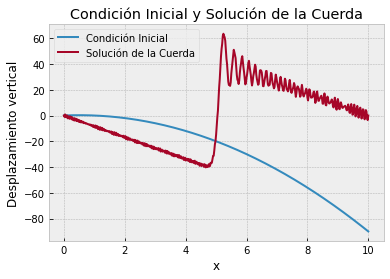

In [ ]:
#Asignar los valores de nuestro problema 

#Valores  
V0 = None # Velocidad Inicial
f = None # función de forzamiento
I = lambda x: x*(1-x) # Condición Incial
c = 100 # Velocidad de propagación m/s
L = 10 # Longitud de la cuerda
Nx = 500 # Núm. de puntos en x
T = 0.25 # Tiempo final de Integración
C = 0.1 # c*k/h Constante de Courant < 1
b = 0.5 # Coeficiente de amortiguamento




# Resolver nuestro caso
user_data = {}
u, x, t, cpu_time = solver(b, I, V0, f, c, L, Nx, C, T, user_action=user_action)
print('u.spahe:', u.shape)
print('x.shape:', x.shape)
print('t.shape:', t.shape)
print('CPU time:',cpu_time)
print('dt = T/len(user_data['u']):', 0.25/len(user_data['u']))


# Graficar la solución
I = x*(1-x)
plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y Solución de la Cuerda')
plt.plot(x,I,label="Condición Inicial")
plt.plot(x,u,label="Solución de la Cuerda")
plt.legend()

**Ejercicio 2:**

Haga el desarrollo del algoritmo de diferencias finitas centradas para resolver la ecuación de onda en 1 dimensión si se tiene un término de forzamiento $f(x,t)$

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Con las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}


In [ ]:

# Se define una función que resuelve la Ecuación de Onda 
def solver(I, V, f, c, L, Nx, C, T, user_action=None):
    # Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T].
    x = linspace(0, L, Nx+1) # Malla en x
    dx = x[1] - x[0]
    dt = C*dx/c
    Nt = int(round(T/dt))
    t = linspace(0, Nt*dt, Nt+1) # Malla en t
    # Simplificar la ecuación
    C2 = C**2 
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1) # Solución al nuevo tiempo
    u_1 = zeros(Nx+1) # Solución 1 paso atrás en el tiempo
    u_2 = zeros(Nx+1) # Solución 2 pasos atrás en el tiempo
    
    import time; 
    #t0 = time.clock() # Mediremos el tiempo de CPU
    t0 = time.process_time()

    # Cargar la condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])   ##condicion al tiempo 0

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    # Fórmula del primer paso
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + 0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + 0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0  ##condiciones a los extremos
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        # Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = - u_2[i] + 2*u_1[i] + \
            C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
            dt**2*f(x[i], t[n])
        # Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    cpu_time = t0 - time.process_time()
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

**Ejercicio 3.**

Resuelva la Ecuación KdV, para el caso de 2 solitones comenzando en $x01 = 0.25*L$ y $x02 = 0.75*L$, con velocidades $c1=0.75$ y $c2=0.01$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones como en el ejemplo que se proporcionó.

Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


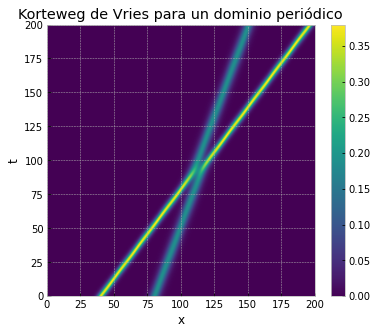

In [ ]:
#!python 
#Solución de la Ecuación de KdV en un dominio periódico

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.2*L
    x02 = 0.4*L
    c1= 0.76
    c2= 0.38
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) #+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()


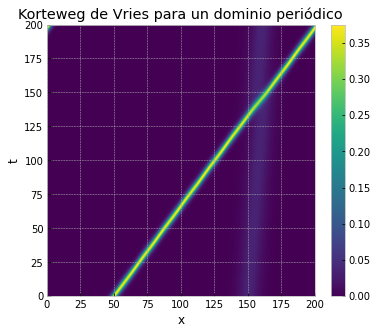

In [ ]:
def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.75*L
    c1= 0.75
    c2= 0.075
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) #+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

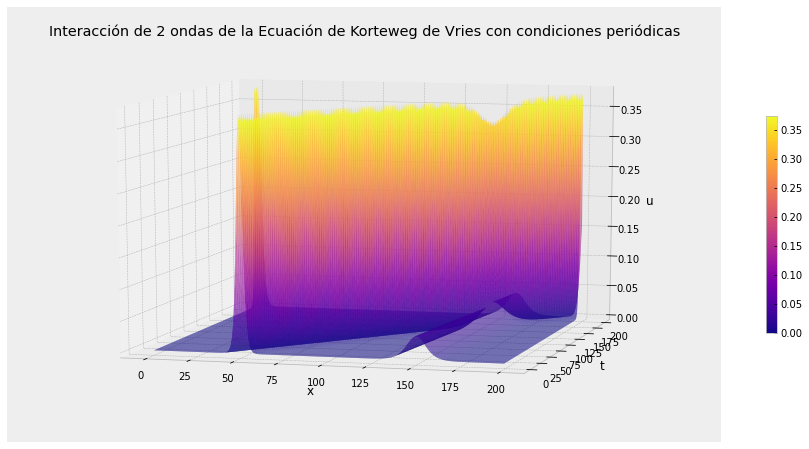

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, t)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='plasma', rstride=1, cstride=1, alpha=0.75)

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap='plasma')
m.set_array(sol)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=10, azim=-75)
ax.set_title('Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas')
plt.show()

**Ejercicio 4:**

Resuelva la Ecuación KdV, para el caso de 3 solitones comenzando en $x01 = 0.25*L$, $x02=0.5*L$, y $x03 = 0.75*L$, con velocidades $c1=0.75$, $c2=0.5$ y $c3=0.25$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones.

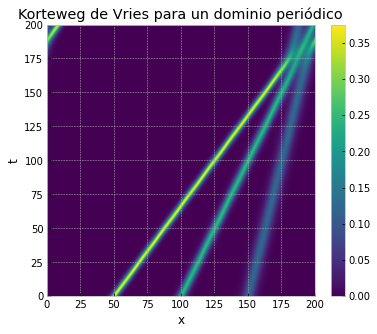

In [ ]:
def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    # Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    # Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    # Define el tamaño del dominio y crea una malla discretizada.
    L = 200.0
    # Preferentemente N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256

    dx = L / (Nx - 1.0) # dx < 0.8
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) # L < N

    # Definir las condiciones iniciales
    # Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    # Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    # Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.5*L
    x03 = 0.75*L
    c1= 0.75
    c2= 0.5
    c3= 0.25
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) + kdv_exact(x-x03,c3)#+ kdv_exact(x02+L/10-x, 0.9*c2)
    
    # Definir el tamaño del dominio en el tiempo
    # Tiempo final T
    T = 200
    Nt = 501
    t = np.linspace(0, T, Nt)

    sol = kdv_solution(u0, t, L)


    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

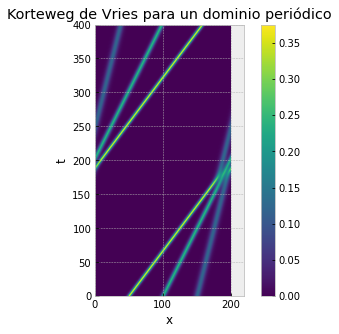

In [ ]:
T = 400
Nt = 1002
t = np.linspace(0, T, Nt)

sol = kdv_solution(u0, t, L)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(sol[::-1, :], extent=[0,L,0,T])
#Aqui no movemos porque solo lo ajsuta a la escala
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.axis([0,L+20,0,400])
plt.title('Korteweg de Vries para un dominio periódico')
plt.show()

In [ ]:
#!python 
#Solución de la Ecuación de Onda en 2D: Utt = (Uxx+Uyy)
# Método de Diferencias Finitas 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: 0.1*np.sin(np.pi*r)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() # No funcionó en Google Colab
    plt.show()
    
if __name__ == "__main__":
    main()
    

**Ejercicio 5:**

En el ejemplo resuleto anterior, se mostró la evolución de la condición inicial 

\begin{equation*}
u_0^{(2,1)}(x,y,0) = sin (\pi x) \sin (\frac{\pi y}{2})
\end{equation*}

mostrando el *modo (1,2)* de oscilación natural de la membrana ([Ver estas animaciones](https://www.acs.psu.edu/drussell/Demos/MembraneSquare/Square.html)). 
 
En este Ejercicio se pide mostrar la evolución del *modo (1,1)*, con la condición inicial 

\begin{equation*}
u_0^{(1,1)}(x,y,0) = \sin (\frac{\pi x}{2}) \sin (\frac{\pi y}{2})
\end{equation*}

In [ ]:
# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(np.pi*r/2)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


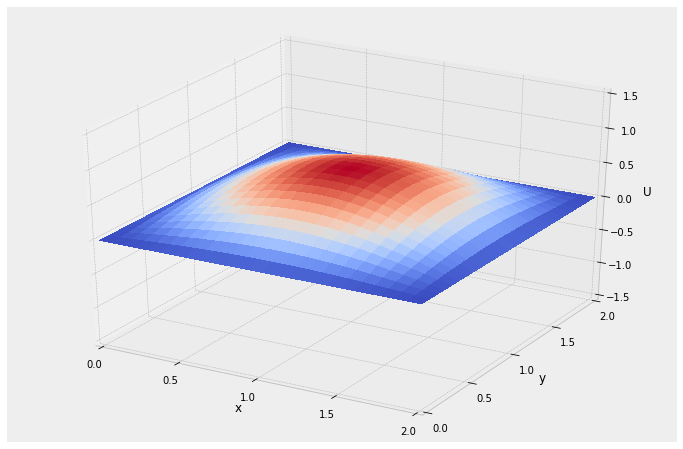

paso: 10.0 t= 0.285


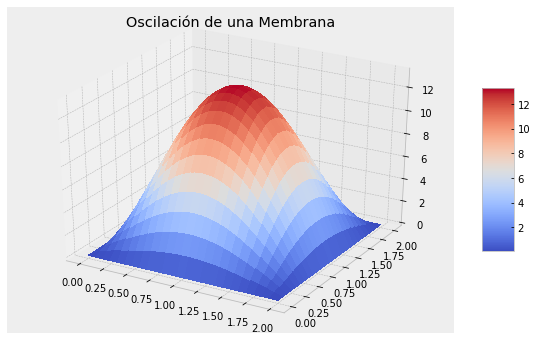

paso: 20.0 t= 0.585


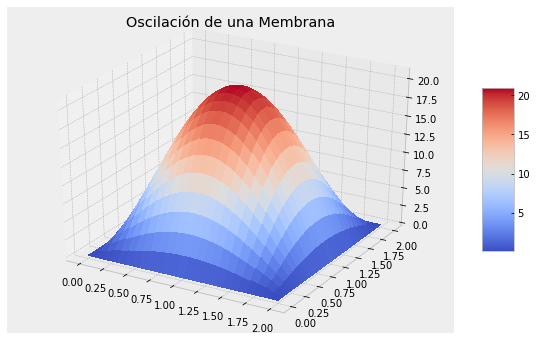

paso: 30.0 t= 0.885


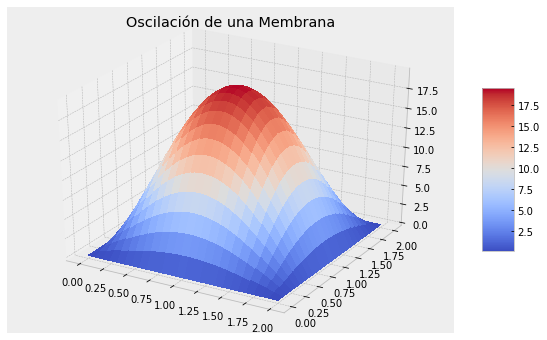

paso: 40.0 t= 1.185


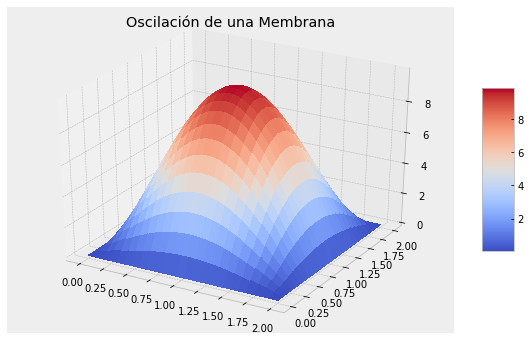

paso: 50.0 t= 1.4849999999999999


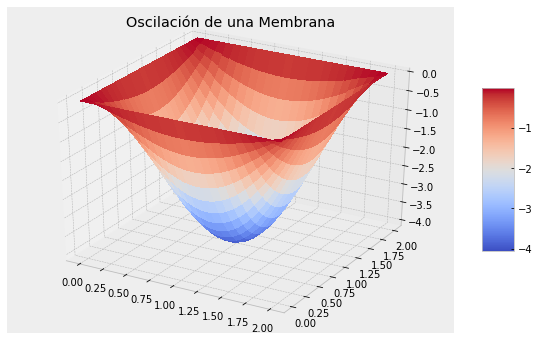

paso: 60.0 t= 1.785


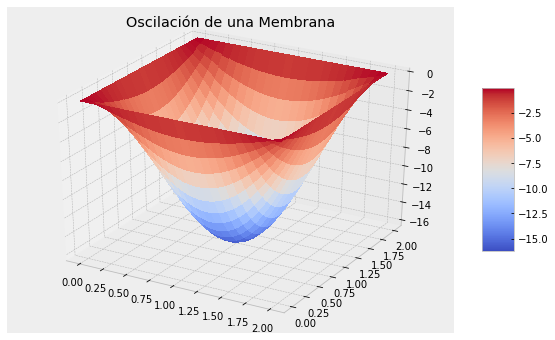

paso: 70.0 t= 2.085


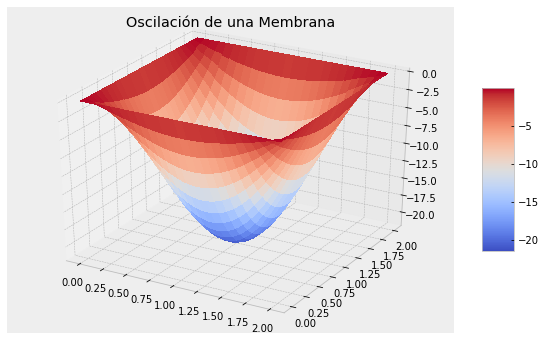

paso: 80.0 t= 2.385


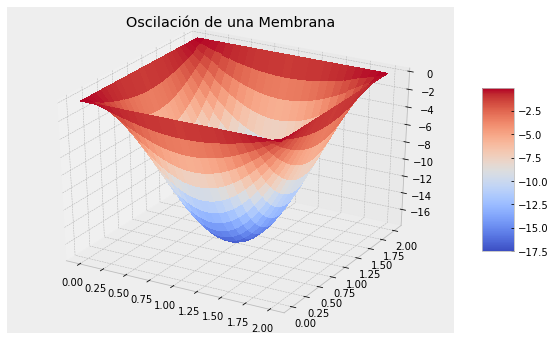

paso: 90.0 t= 2.685


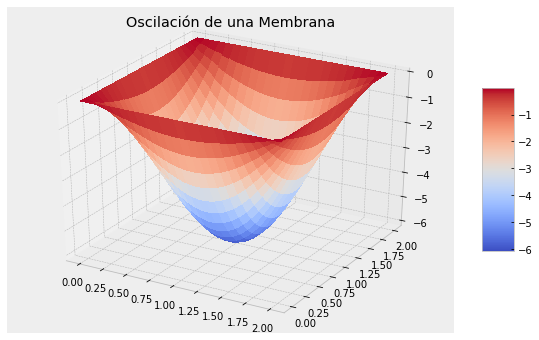

paso: 100.0 t= 2.985


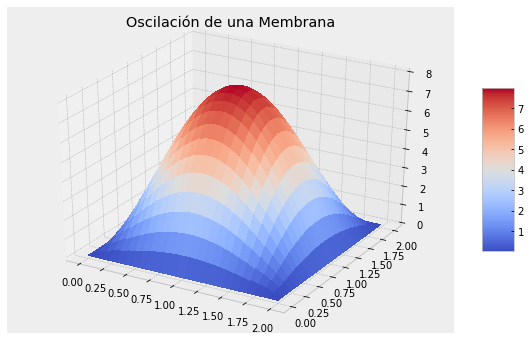

In [ ]:
# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate()
    plt.show()
    
if __name__ == "__main__":
    main()


**Ejercicio 6:**

En el mismo contexto que el problema anterior, muestra la evolución de la superposición *modos (3,1)+ (1,3)* dada la condición inicial

\begin{equation*}
u_0^{(3,1)+(1,3)}(x,y,0) = \sin (\frac{3 \pi x}{2}) \sin (\frac{\pi y}{2}) + \sin (\frac{\pi x}{2}) \sin (\frac{3 \pi y}{2})
\end{equation*}

In [ ]:
# Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(3*np.pi*r/2)*np.sin(np.pi*s/2)\
        +np.sin(np.pi*r/2)*np.sin(3*np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            # Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                # Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                # Creating color map
                my_cmap = plt.get_cmap('coolwarm')
                # Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                # show plot
                plt.show()

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


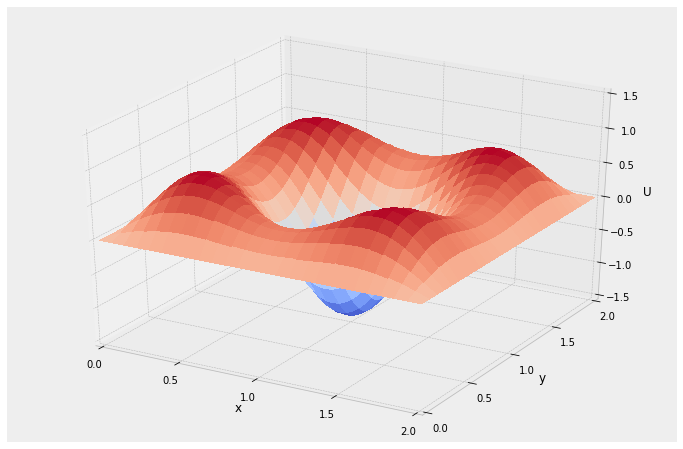

paso: 10.0 t= 0.285


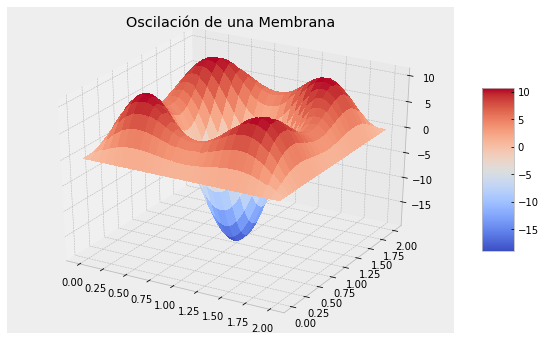

paso: 20.0 t= 0.585


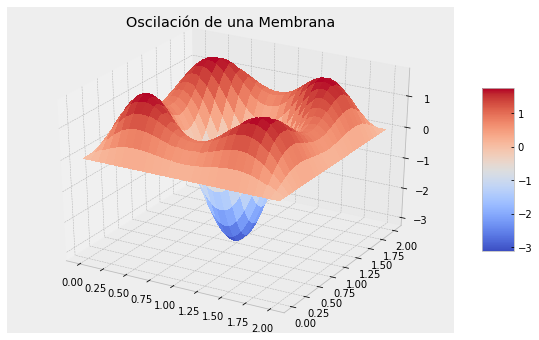

paso: 30.0 t= 0.885


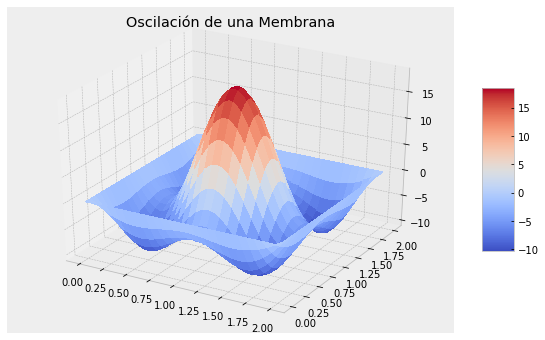

paso: 40.0 t= 1.185


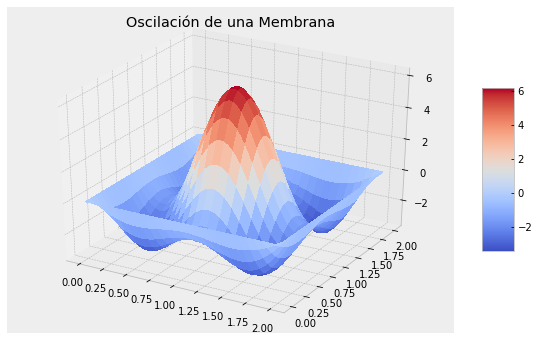

paso: 50.0 t= 1.4849999999999999


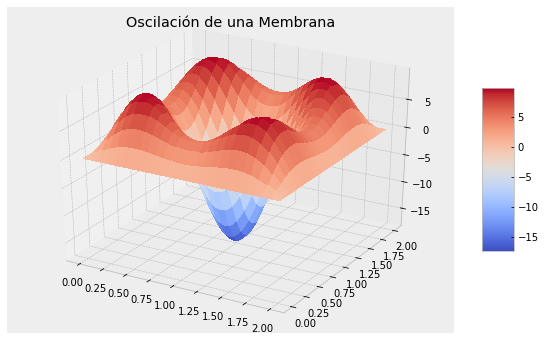

paso: 60.0 t= 1.785


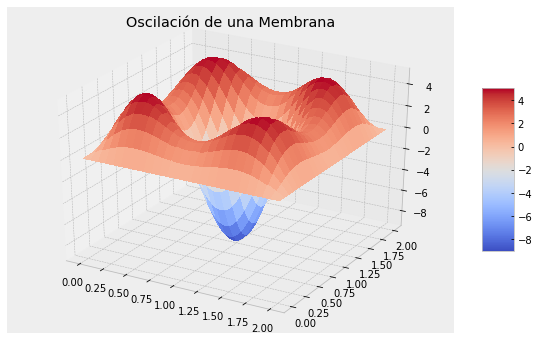

paso: 70.0 t= 2.085


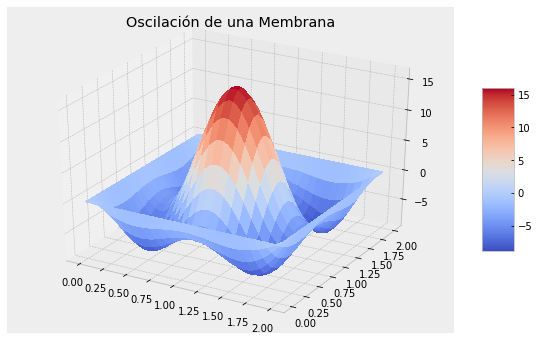

paso: 80.0 t= 2.385


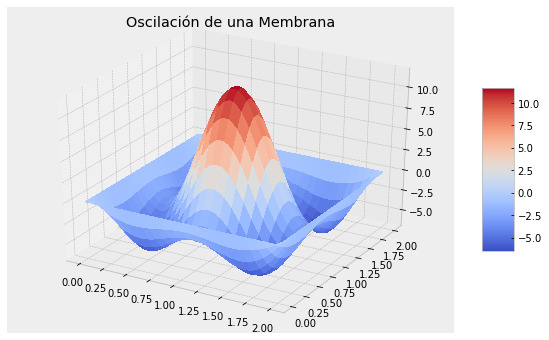

paso: 90.0 t= 2.685


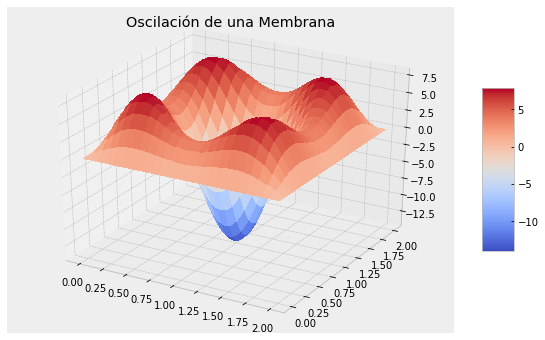

paso: 100.0 t= 2.985


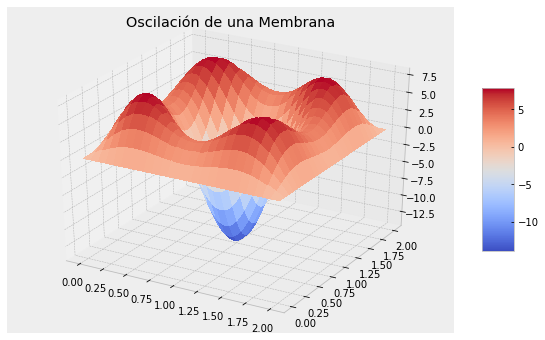

In [ ]:
# Se definen los parámetros con los que se va a ejecutar el código     
# N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate()
    plt.show()
    
if __name__ == "__main__":
    main()

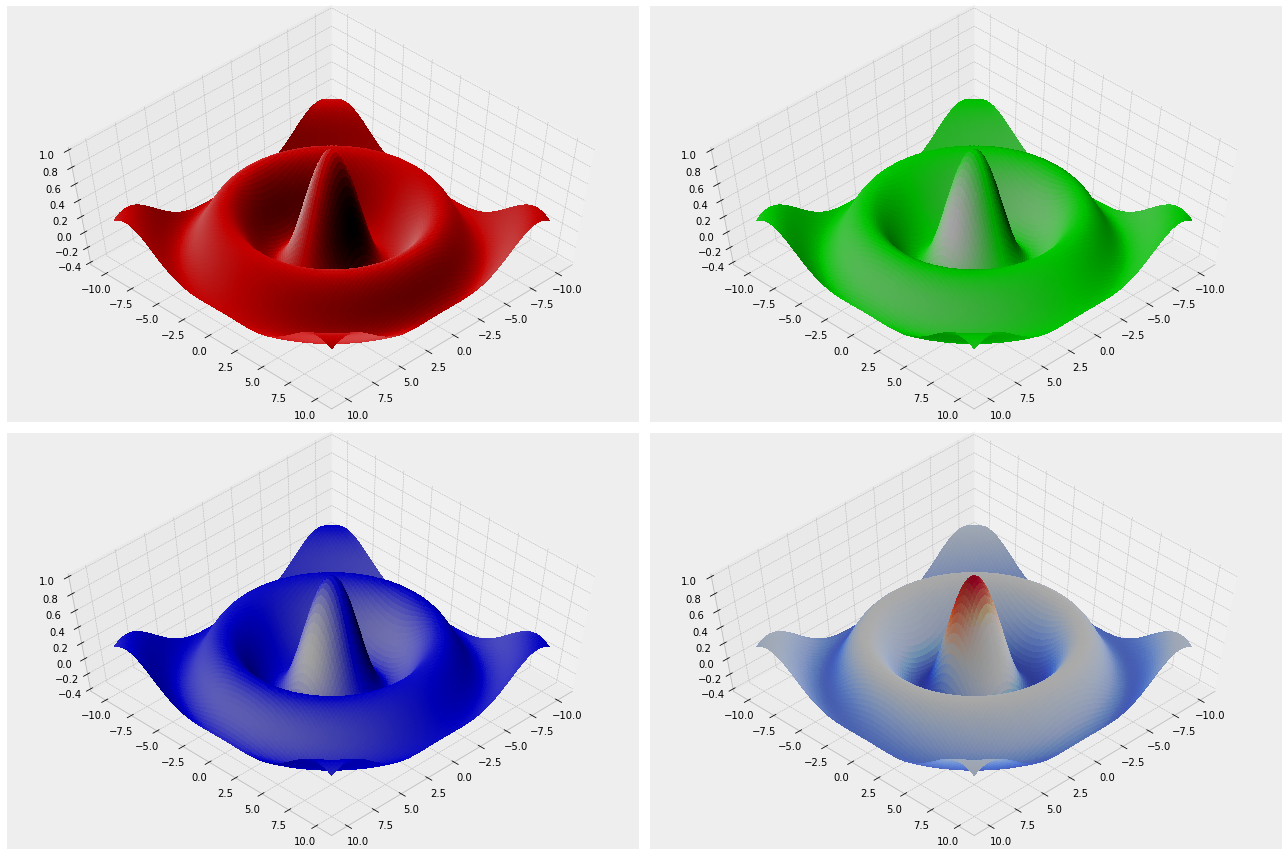

In [ ]:
# =========================================================================
# shading.py
# Author:   Jesse M. Kinder
# Created:  2015 Jul 27
# Modified: 2015 Jul 31
# -------------------------------------------------------------------------
# Demonstrate shading of surface plots using Matplotlib's LightSource.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import Bessel function.
from scipy.special import jn

# Import colormaps.
from matplotlib import cm

# Import lighting object for shading surface plots.
from matplotlib.colors import LightSource

# Define grid of points.
points = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(points, points)
R = np.sqrt(X**2 + Y**2)
Z = jn(0,R)

# Create an rgb array for single-color surfaces.
white = np.ones((Z.shape[0], Z.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])

# Set view parameters for all subplots.
azimuth = 45
altitude = 60

# Create empty figure.
fig = plt.figure(figsize=(18,12))

# -------------------------------------------------------------------------
# Generate first subplot.
# ------------------------------------------------------------------------- 
# Create a light source object for light from
# 0 degrees azimuth, 0 degrees elevation.
light = LightSource(0, 0)

# Generate face colors for a shaded surface using either
# a color map or the uniform rgb color specified above.

illuminated_surface = light.shade_rgb(red, Z)

# Create a subplot with 3d plotting capabilities.
# This command will fail if Axes3D was not imported.
ax = fig.add_subplot(2,2,1, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# -------------------------------------------------------------------------
# Repeat the commands above for the other three subplots, but use different
# illumination angles and colors.
# ------------------------------------------------------------------------- 
light = LightSource(90, 0)
illuminated_surface = light.shade_rgb(green, Z)

ax = fig.add_subplot(2,2,2, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(90, 45)
illuminated_surface = light.shade_rgb(blue, Z)

ax = fig.add_subplot(2,2,3, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
light = LightSource(180, 45)
illuminated_surface = light.shade(Z, cmap=cm.coolwarm)

ax = fig.add_subplot(2,2,4, projection='3d')
ax.view_init(altitude, azimuth)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
                antialiased=False, facecolors=illuminated_surface)

# ------------------------------------------------------------------------- 
plt.tight_layout()
#plt.savefig('shading.png')

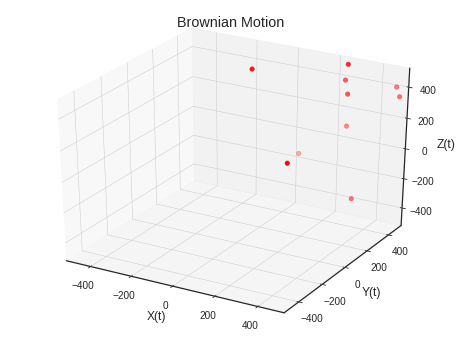

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
from mpl_toolkits import mplot3d

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

N=10
x=500*np.random.random(N)
y=500*np.random.random(N)
z=500*np.random.random(N)

def frame(w):
    ax.clear()
    global x,y,z
    x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
    y=y+np.random.normal(loc=0.0,scale=50.0,size=10)
    z=z+np.random.normal(loc=0.0,scale=50.0,size=10)

    plt.title("Brownian Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim3d(-500.0,500.0)
    ax.set_ylabel('Y(t)')
    ax.set_ylim3d(-500.0,500.0)
    ax.set_zlabel('Z(t)')
    ax.set_zlim3d(-500.0,500.0) 
    plot=ax.scatter3D(x, y, z, c='r')
    return plot

anim = animation.FuncAnimation(fig, frame, frames=10, blit=False, repeat=True)

anim